In [198]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv("multi-cloud-configuration.csv")

In [200]:
df

,Unnamed: 0,provider,A_family,A_vcpu,B_family,B_vcpu,C_family,C_type,C_vcpu,nodes,workload,target_cost,target_runtime,status
0,0,C,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3,buzz-logistic_regression,0.024583,188.857647,ok
1,1,C,NaN,NaN,NaN,NaN,1.0,1.0,0.0,3,buzz-standard_scaler,0.000558,8.573995,ok
2,2,C,NaN,NaN,NaN,NaN,1.0,0.0,0.0,4,creditcard-poisson_regression,0.006502,55.943406,ok
3,3,B,NaN,NaN,1.0,0.0,NaN,NaN,NaN,4,santander-spectral_clustering,0.003819,14.564142,"Input contains NaN, infinity or a value too 0 ..."
4,4,C,NaN,NaN,NaN,NaN,1.0,2.0,0.0,3,santander-kmeans,0.012438,114.547783,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,2502,C,NaN,NaN,NaN,NaN,0.0,2.0,1.0,5,santander-logistic_regression,0.024752,89.541345,ok
2503,2503,A,2.0,0.0,NaN,NaN,NaN,NaN,NaN,5,santander-kmeans,0.002747,66.142187,ok
2504,2504,C,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2,santander-xgboost,0.007635,186.284445,ok
2505,2505,C,NaN,NaN,NaN,NaN,0.0,1.0,0.0,2,creditcard-standard_scaler,0.000287,9.491288,ok


In [201]:
df.shape

(2507, 14)

In [202]:
df_A = df[df["provider"] == 'A'][["provider","A_family", "A_vcpu","C_type", "nodes", "workload", "target_cost", "target_runtime"]]
df_B = df[df["provider"] == 'B'][["provider","B_family", "B_vcpu","C_type", "nodes", "workload", "target_cost", "target_runtime"]]
df_C = df[df["provider"] == 'C'][["provider","C_family", "C_vcpu","C_type", "nodes", "workload", "target_cost", "target_runtime"]]


In [203]:
df_A["A_family"] = df_A["A_family"].map({0.0: "A_0", 1.0: "A_1", 2.0: "A_2"})
df_A["A_vcpu"] = df_A["A_vcpu"].map({0.0: "A_0", 1.0: "A_1"})

df_A.head()

,provider,A_family,A_vcpu,C_type,nodes,workload,target_cost,target_runtime
5,A,A_1,A_1,NaN,5,santander-kmeans,0.008030,87.870539
6,A,A_1,A_0,NaN,5,santander-spectral_clustering,0.000477,10.443275
8,A,A_1,A_1,NaN,5,santander-kmeans,0.007533,82.431383
10,A,A_1,A_1,NaN,5,creditcard-naive_bayes,0.000280,3.065078
20,A,A_0,A_0,NaN,5,santander-poisson_regression,0.012558,287.956797


In [204]:
df_B["B_family"] = df_B["B_family"].map({0.0: "B_0", 1.0: "B_1"})
df_B["B_vcpu"] = df_B["B_vcpu"].map({0.0: "B_0", 1.0: "B_1"})

df_B.head()

,provider,B_family,B_vcpu,C_type,nodes,workload,target_cost,target_runtime
3,B,B_1,B_0,NaN,4,santander-spectral_clustering,0.003819,14.564142
12,B,B_1,B_0,NaN,2,buzz-spectral_clustering,0.001309,9.980881
23,B,B_0,B_0,NaN,5,creditcard-linear_regression,0.017530,49.497707
25,B,B_0,B_1,NaN,2,creditcard-kmeans,0.004673,16.491422
38,B,B_1,B_1,NaN,2,buzz-quantile_transformer,0.008302,31.659070


In [205]:
df_C["C_family"] = df_C["C_family"].map({0.0: "C_0", 1.0: "C_1"})
df_C["C_vcpu"] = df_C["C_vcpu"].map({0.0: "C_0", 1.0: "C_1"})
df_C.head()

,provider,C_family,C_vcpu,C_type,nodes,workload,target_cost,target_runtime
0,C,C_1,C_1,1.0,3,buzz-logistic_regression,0.024583,188.857647
1,C,C_1,C_0,1.0,3,buzz-standard_scaler,0.000558,8.573995
2,C,C_1,C_0,0.0,4,creditcard-poisson_regression,0.006502,55.943406
4,C,C_1,C_0,2.0,3,santander-kmeans,0.012438,114.547783
7,C,C_1,C_1,2.0,3,santander-quantile_transformer,0.016928,77.948471


In [206]:
 #rename columns

In [207]:
df_A.rename(columns={"A_family": "family", "A_vcpu" : "vcpu", "C_type": "type"}, inplace=True)
df_A.fillna(0, inplace=True)
df_B.rename(columns={"B_family": "family", "B_vcpu" : "vcpu", "C_type": "type"}, inplace=True)
df_B.fillna(0, inplace=True)
df_C.rename(columns={"C_family": "family", "C_vcpu" : "vcpu", "C_type": "type"}, inplace=True)

In [208]:
df_A.head()

,provider,family,vcpu,type,nodes,workload,target_cost,target_runtime
5,A,A_1,A_1,0.0,5,santander-kmeans,0.008030,87.870539
6,A,A_1,A_0,0.0,5,santander-spectral_clustering,0.000477,10.443275
8,A,A_1,A_1,0.0,5,santander-kmeans,0.007533,82.431383
10,A,A_1,A_1,0.0,5,creditcard-naive_bayes,0.000280,3.065078
20,A,A_0,A_0,0.0,5,santander-poisson_regression,0.012558,287.956797


In [209]:
df_B.head()

,provider,family,vcpu,type,nodes,workload,target_cost,target_runtime
3,B,B_1,B_0,0.0,4,santander-spectral_clustering,0.003819,14.564142
12,B,B_1,B_0,0.0,2,buzz-spectral_clustering,0.001309,9.980881
23,B,B_0,B_0,0.0,5,creditcard-linear_regression,0.017530,49.497707
25,B,B_0,B_1,0.0,2,creditcard-kmeans,0.004673,16.491422
38,B,B_1,B_1,0.0,2,buzz-quantile_transformer,0.008302,31.659070


In [210]:
df_C.head()

,provider,family,vcpu,type,nodes,workload,target_cost,target_runtime
0,C,C_1,C_1,1.0,3,buzz-logistic_regression,0.024583,188.857647
1,C,C_1,C_0,1.0,3,buzz-standard_scaler,0.000558,8.573995
2,C,C_1,C_0,0.0,4,creditcard-poisson_regression,0.006502,55.943406
4,C,C_1,C_0,2.0,3,santander-kmeans,0.012438,114.547783
7,C,C_1,C_1,2.0,3,santander-quantile_transformer,0.016928,77.948471


In [211]:
frames = [df_A, df_B, df_C]
final_df = pd.concat(frames)
final_df

,provider,family,vcpu,type,nodes,workload,target_cost,target_runtime
5,A,A_1,A_1,0.0,5,santander-kmeans,0.008030,87.870539
6,A,A_1,A_0,0.0,5,santander-spectral_clustering,0.000477,10.443275
8,A,A_1,A_1,0.0,5,santander-kmeans,0.007533,82.431383
10,A,A_1,A_1,0.0,5,creditcard-naive_bayes,0.000280,3.065078
20,A,A_0,A_0,0.0,5,santander-poisson_regression,0.012558,287.956797
...,...,...,...,...,...,...,...,...
2501,C,C_1,C_0,1.0,4,buzz-quantile_transformer,0.001895,21.842379
2502,C,C_0,C_1,2.0,5,santander-logistic_regression,0.024752,89.541345
2504,C,C_0,C_0,0.0,2,santander-xgboost,0.007635,186.284445
2505,C,C_0,C_0,1.0,2,creditcard-standard_scaler,0.000287,9.491288


In [212]:
#save it as excel file

In [213]:

cost = final_df["target_cost"].values * 100 / final_df["target_cost"].values.sum()
runtime = final_df["target_runtime"].values * 100 / final_df["target_runtime"].values.sum()
final_df["ratio"] = cost + runtime
final_df.drop(columns=["family"], inplace=True)
final_df

,provider,vcpu,type,nodes,workload,target_cost,target_runtime,ratio
5,A,A_1,0.0,5,santander-kmeans,0.008030,87.870539,0.071697
6,A,A_0,0.0,5,santander-spectral_clustering,0.000477,10.443275,0.006611
8,A,A_1,0.0,5,santander-kmeans,0.007533,82.431383,0.067259
10,A,A_1,0.0,5,creditcard-naive_bayes,0.000280,3.065078,0.002501
20,A,A_0,0.0,5,santander-poisson_regression,0.012558,287.956797,0.179875
...,...,...,...,...,...,...,...,...
2501,C,C_0,1.0,4,buzz-quantile_transformer,0.001895,21.842379,0.017419
2502,C,C_1,2.0,5,santander-logistic_regression,0.024752,89.541345,0.139393
2504,C,C_0,0.0,2,santander-xgboost,0.007635,186.284445,0.114405
2505,C,C_0,1.0,2,creditcard-standard_scaler,0.000287,9.491288,0.005421


In [222]:
final_df.to_excel("multi-cloud-configuration-final.xlsx")

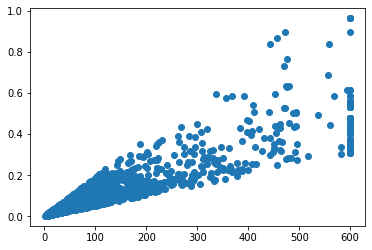

In [219]:
plt.scatter(final_df["target_runtime"], final_df["ratio"])

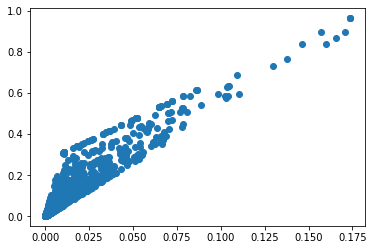

In [220]:
plt.scatter(final_df["target_cost"], final_df["ratio"])

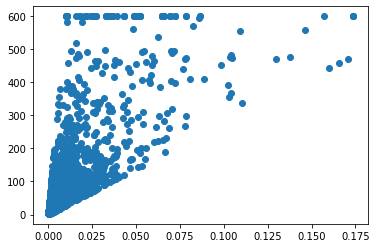

In [221]:
plt.scatter(final_df["target_cost"], final_df["target_runtime"])